<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/subReddit_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Cleaning & Corpus EDA**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re
import string
import nltk
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from string import digits

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unlabelled Discussion DATA.xlsx')
df.info()
df.isna().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1194 non-null   object        
 4   Body Text            929 non-null    object        
 5   Top Comment          91 non-null     object        
 6   Top Comment Reply 1  25 non-null     object        
 7   Top Comment Reply 2  10 non-null     object        
 8   Top Comment Reply 3  0 non-null      float64       
 9   Top Comment Reply 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 93.9+ KB


subReddit              1200
Date                   1200
Datetime               1200
Title                  1200
Body Text              1200
Top Comment            1200
Top Comment Reply 1    1200
Top Comment Reply 2    1200
Top Comment Reply 3    1200
Top Comment Reply 4    1200
dtype: int64

In [ ]:
df.fillna('',inplace=True)

In [ ]:
#RAW_EDA = ['subReddit','Title','Body Text','Top Comment', 'Top Comment Reply 1']

# **Join the relevant text columns to create a "Discussion" column to perform topic modelling on.**

In [ ]:
#df_EDA = df[RAW_EDA].copy()
df['Discussion']=df.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)
df['Raw Discussion']=df.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1200 non-null   object        
 4   Body Text            1200 non-null   object        
 5   Top Comment          1200 non-null   object        
 6   Top Comment Reply 1  1200 non-null   object        
 7   Top Comment Reply 2  1200 non-null   object        
 8   Top Comment Reply 3  1200 non-null   object        
 9   Top Comment Reply 4  1200 non-null   object        
 10  Discussion           1200 non-null   object        
 11  Raw Discussion       1200 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 112.6+ KB


,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,Cheapest way to get a CGM without insurance? W...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,Libre 3 doesn’t stick I’ve used the Libre 3 fo...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,Frustrated with Libre 3 I just got off the pho...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,Libre 3 Graphs 3 weeks in The first graph was ...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,Confused by GMI on Libre 3 I'm finding myself ...,Confused by GMI on Libre 3 I'm finding myself ...


In [ ]:
df['Discussion'] = df['Discussion'].str.lower()
# df['Body Text'] = df['Body Text'].str.lower()
# df['Top Comment'] = df['Top Comment'].str.lower()
# df['Top Comment Reply 1'] = df['Top Comment Reply 1'].str.lower()
# df['Top Comment Reply 2'] = df['Top Comment Reply 2'].str.lower()
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way to get a cgm without insurance? w...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre 3 doesn’t stick i’ve used the libre 3 fo...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre 3 i just got off the pho...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre 3 graphs 3 weeks in the first graph was ...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused by gmi on libre 3 i'm finding myself ...,Confused by GMI on Libre 3 I'm finding myself ...


In [ ]:
def clean_text_1(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    # Remove remaining tokens that are not alphabetic (including numbers and symbols)
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    # Join the list of words into a single string
    return ' '.join(words)

In [ ]:
# df['Discussion'].apply(lambda x: clean_text_1(x))
df['Discussion'] = df['Discussion'].apply(clean_text_1)
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused gmi libre finding myself confused the...,Confused by GMI on Libre 3 I'm finding myself ...


In [ ]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)


    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text


In [ ]:
df['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused gmi libre finding myself confused the...,Confused by GMI on Libre 3 I'm finding myself ...


In [ ]:
def remove_numbers(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)



    return text

In [ ]:
# def remove_digits(text):
#   remove_digits = str.maketrans('', '', digits)
#   res = text.translate(remove_digits)

#   return text

In [ ]:
# def remove_digits(text):


#     return re.sub(r'\d+', '', text)

In [ ]:
df['Discussion'].apply(lambda x: remove_numbers(x) if isinstance(x, str) else x)
#df['Discussion'].apply(lambda x: remove_digits(x))
df = df[df['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [ ]:
# df['Discussion'].head()
df

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused gmi libre finding myself confused the...,Confused by GMI on Libre 3 I'm finding myself ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,diabetes_t2,2024-01-16 00:00:00,2024-01-16 01:58:00,Morning Spikes,Anyone else get 60/70 point increases in the m...,,,,,,morning spikes anyone else get point increases...,Morning Spikes Anyone else get 60/70 point inc...
1196,diabetes_t2,2024-01-17 00:00:00,2024-01-17 04:09:00,This is what severe anxiety does to my blood s...,I did not eat any carbs with either of those ...,,,,,,this what severe anxiety does blood sugar did ...,This is what severe anxiety does to my blood s...
1197,diabetes,2024-01-16 00:00:00,2024-01-16 09:22:00,I tried having it on my arm just once as sugge...,The filament bent like 15 minutes after I've p...,,,,,,tried having arm just once suggested the manuf...,I tried having it on my arm just once as sugge...
1198,diabetes,2024-01-16 00:00:00,2024-01-16 08:45:00,"Mine keeps breaking, on my right arm.",I have had 3 break and stop reading.,,,,,,mine keeps breaking right arm have had break a...,"Mine keeps breaking, on my right arm. I have h..."


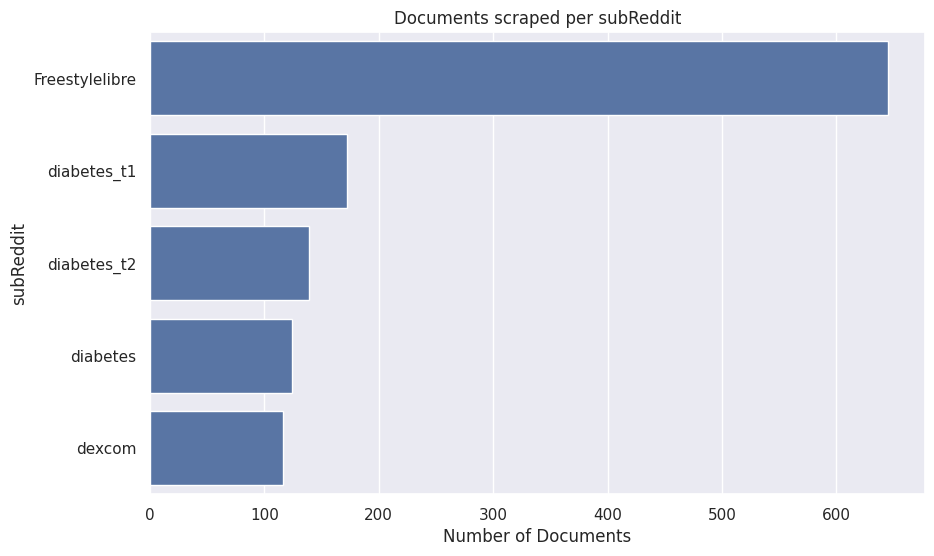

In [ ]:
subReddit_counts = df['subReddit'].value_counts()

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='subReddit', data=df, order = subReddit_counts.index)

# Labeling the plot
plt.title('Documents scraped per subReddit')
plt.xlabel('Number of Documents')
plt.ylabel('subReddit')

# Show the plot
plt.show()

In [ ]:
# subReddit_counts = df['subReddit'].value_counts()

# # Create a count plot
# sns.set(style="darkgrid")
# plt.figure(figsize=(10, 6))
# sns.countplot(y='subReddit', data=df, order = subReddit_counts.index)

# # Labeling the plot
# plt.title('Documents scraped per subReddit')
# plt.xlabel('Number of Documents')
# plt.ylabel('subReddit')

# # Show the plot
# plt.show()

<ipython-input-48-f6d2320e0ce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word Count']= df['Discussion'].apply(lambda text: len(str(text).split()))


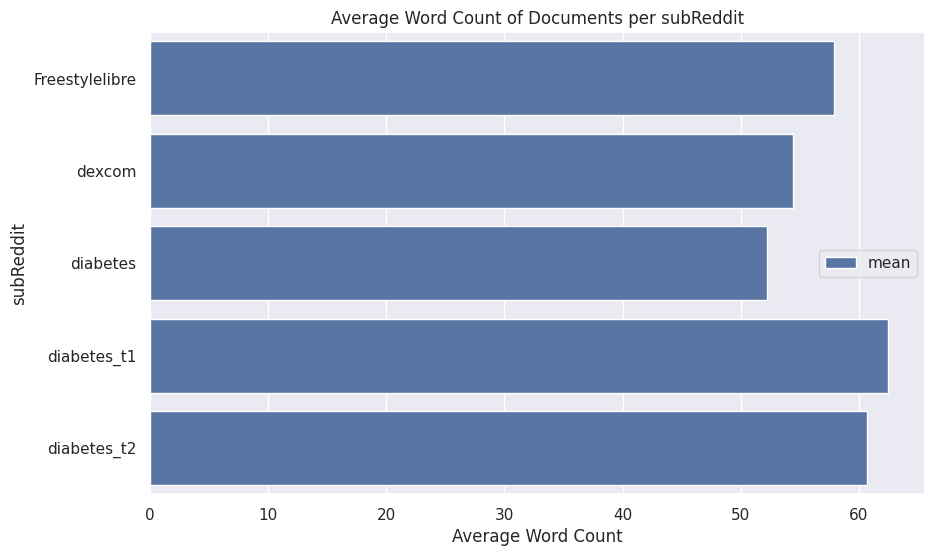

In [ ]:
df['Word Count']= df['Discussion'].apply(lambda text: len(str(text).split()))
stats_df = df.groupby('subReddit')['Word Count'].agg(['mean','max', 'min']).reset_index()
#using pandas melt function to create word count stats in a long format
melted_stats_df = pd.melt(stats_df, id_vars='subReddit', value_vars=['mean'])
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='subReddit', hue='variable', data=melted_stats_df)
#titles
plt.title('Average Word Count of Documents per subReddit')
plt.xlabel('Average Word Count')
plt.ylabel('subReddit')

plt.legend()
plt.show()

<ipython-input-50-4ee21c2ce9e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='High Word Count', y='subReddit', data=subReddit_high_word_count, palette="viridis")


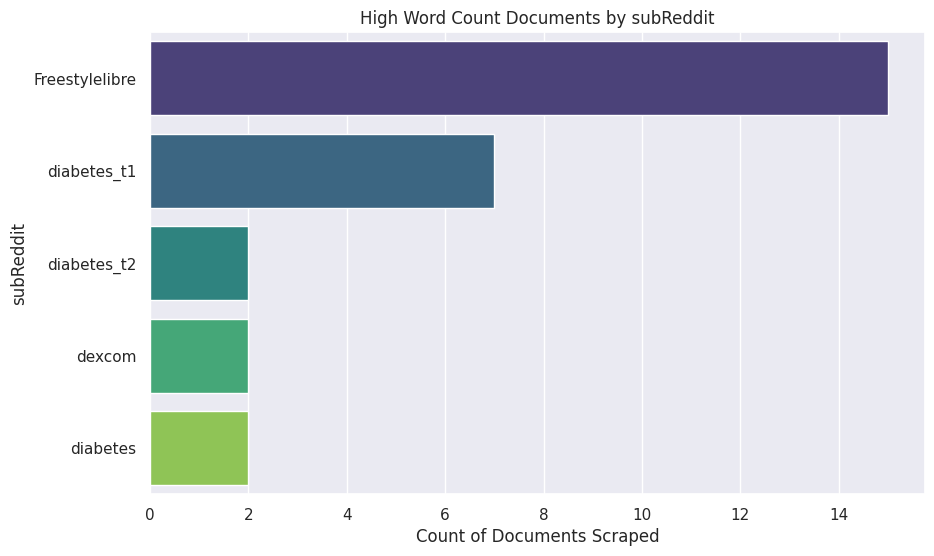

In [ ]:
high_word_count = df[df['Word Count'] > 200]
subReddit_high_word_count = high_word_count['subReddit'].value_counts().reset_index()
subReddit_high_word_count.columns = ['subReddit', 'High Word Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='High Word Count', y='subReddit', data=subReddit_high_word_count, palette="viridis")
plt.title('High Word Count Documents by subReddit')
plt.xlabel('Count of Documents Scraped')
plt.ylabel('subReddit')
plt.show()

<ipython-input-51-dbfbbc3086c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word Count'] = df['Discussion'].apply(lambda text: len(str(text).split()))
<ipython-input-51-dbfbbc3086c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subReddit', y='%Share', data=high_word_count_share_df, palette="viridis")


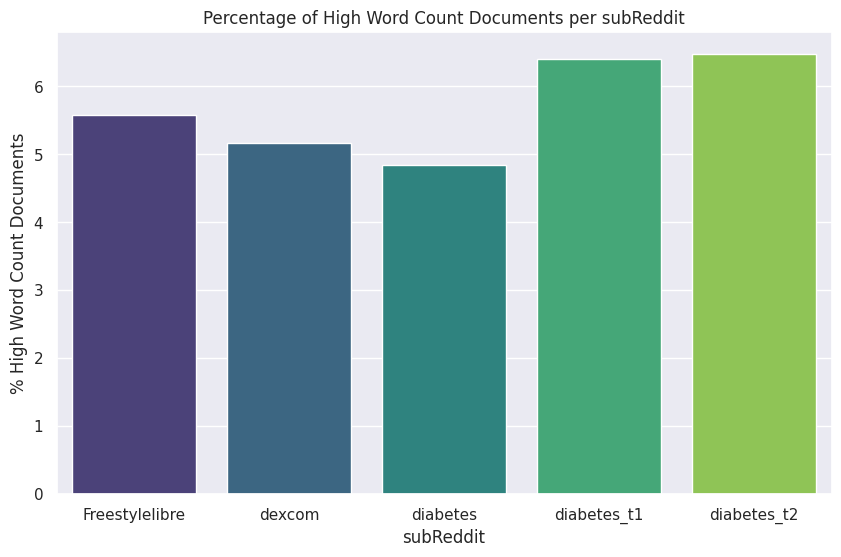

In [ ]:
df['Word Count'] = df['Discussion'].apply(lambda text: len(str(text).split()))
subReddit_counts = df['subReddit'].value_counts()
high_wc_docs = df[df['Word Count'] > 150]['subReddit'].value_counts()
high_word_count_share = (high_wc_docs/subReddit_counts)*100
high_word_count_share_df = high_word_count_share.reset_index()
high_word_count_share_df.columns = ['subReddit', '%Share']
plt.figure(figsize=(10, 6))
sns.barplot(x='subReddit', y='%Share', data=high_word_count_share_df, palette="viridis")
plt.title('Percentage of High Word Count Documents per subReddit')
plt.xlabel('subReddit')
plt.ylabel('% High Word Count Documents')
plt.show()

In [ ]:
keywords = ['prescription', 'pay', 'walmart', 'walgreens', 'fda', 'restrictions', 'tandem', 'insurance', 'cgm insurance', 'CVS']
pattern = '|'.join(keywords)  #patterns
df['Polluting Words'] = df['Discussion'].str.contains(pattern, case=False)

<ipython-input-52-02656f1c962c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polluting Words'] = df['Discussion'].str.contains(pattern, case=False)


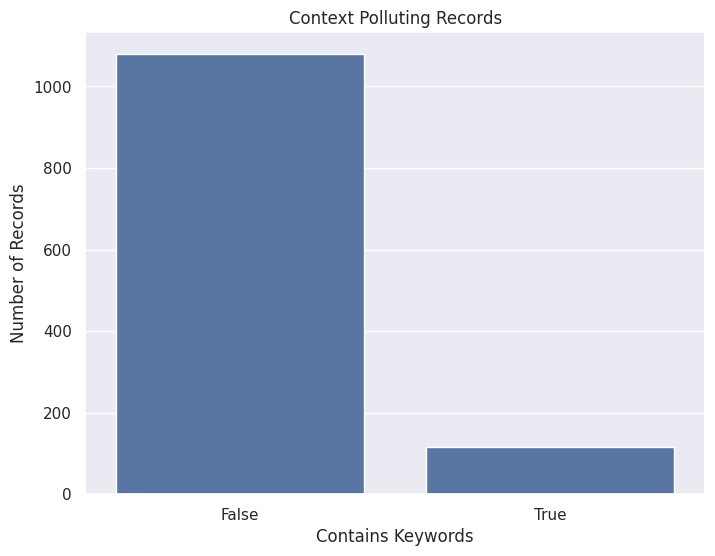

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Polluting Words', data=df)
plt.title('Context Polluting Records')
plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

<ipython-input-54-4fbab7f25824>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['App Related'] = df['Discussion'].str.contains(pattern, case=False)


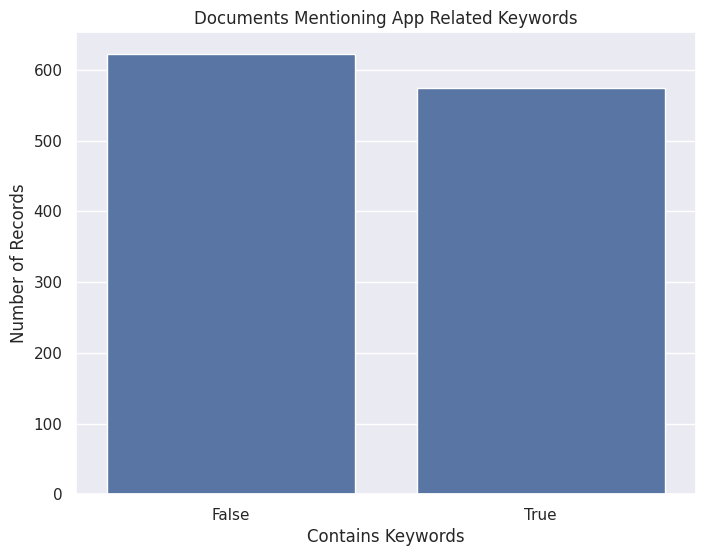

In [ ]:
app_issue_keywords = ['signal','bluetooth','librelink','app']
pattern = '|'.join(app_issue_keywords)  #patterns
df['App Related'] = df['Discussion'].str.contains(pattern, case=False)

plt.figure(figsize=(8, 6))
sns.countplot(x='App Related', data=df)
plt.title('Documents Mentioning App Related Keywords')
plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

<ipython-input-55-3157d7044473>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sensor Brand Keywords'] = df['Discussion'].str.contains(pattern, case=False)


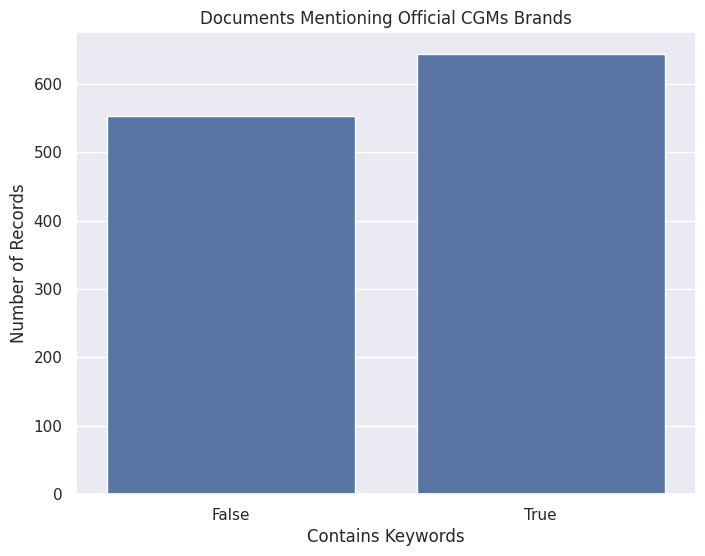

In [ ]:
sensor_brand_keywords = ['libre','dexcom','dex','freestyle libre','freestyle']
pattern = '|'.join(sensor_brand_keywords)
df['Sensor Brand Keywords'] = df['Discussion'].str.contains(pattern, case=False)

plt.figure(figsize=(8, 6))
sns.countplot(x='Sensor Brand Keywords', data=df)
plt.title('Documents Mentioning Official CGMs Brands')
plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

In [ ]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/Stage1NLP.xlsx')